In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
import seaborn as sns

In [4]:
data=pd.read_csv('1.02. Multiple linear regression.csv')

In [5]:
 data
#same data that assigns 1,2 or3 randomly to each student. This variable cannot predict GPA

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
5,1670,2.91,1
6,1764,3.00,2
7,1764,3.00,1
8,1792,3.01,2
9,1850,3.01,3


In [6]:
#our new model becomes:
#GPA=b0+b1*SAT+b2*Rand1,2,3
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [7]:
y=data['GPA']
x1=data[['SAT','Rand 1,2,3']]

In [8]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()

In [9]:
results.summary()
#compare this table with the old table which we got in DSBC_LinearRegression_1
#new R-squared is> old R-squared. So the explanatory power of the model has increased
#however the new Adjusted R-squared is < old Adj. R-squared. We were penalized for adding one more variable which has no strong explanatory power. We added information but we lost value
#Point is be careful in picking data to avoid useless information. However adding an impractical variable must be pointed out by the model in someway
#Check the coeff table.The p-value for Rand 1,2,3 is 0.762. If you remember null hypothesis, this value is like b2=0(b2 is the coeff of Rand 1,2,3). we cannot reject the null hypothesis at 76% signicance level
#Recall that for a coefficient to be statistically significant, the p-value must be <0.05.
#Also if you check the previous equation and this equation, the intercept has changed from 0.275 to 0.296. Whenever we have one variable, the bias of which affects the coeff of other variable, then we should not use that model
#So the variable Rand 1,2,3 worsens the explanatory power(lower adj r-squared) but is also insignificant
#so it should be dropped altogether

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Mon, 12 Aug 2019   Prob (F-statistic):           6.58e-10
Time:                        09:08:25   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Including Dummy Variables

In [10]:
#dummy variable is used to include categorical data into regression. Till now we worked with only numerical data like SAT and GPA. Now lets try to include some categorical data in our regression like gender,season,brand etc.
#So another measure of GPA or another regressor which can be used to predict GPA is attendance.If the student attended a 75% of lectures then they are mostly getting good GPA
#So we have SAT GPA and Attendance. NOw since attendance has Yes and No as values, so we cannot directly include it into our regression. So we will go through the process of using  a dummy
raw_data=pd.read_csv('1.03. Dummies.csv')

In [11]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


In [12]:
#map the Yes and No values to 1 and 0. We are imitating the category with numbers(dummy variable concept)
#creating a copy of the data
data=raw_data.copy()

In [13]:
#specifying the entries of Yes and No to be mapped to 1 and 0
data['Attendance']=data['Attendance'].map({'Yes':1,'No':0})

In [14]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3.00,0
7,1764,3.00,0
8,1792,3.01,0
9,1850,3.01,0


In [15]:
data.describe()
#observe that the mean of Attendance is 0.46, i.e. less than 0.5, which means that there are more 0s than 1s. 46% of the students attended 75% of the lectures

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [16]:
#Creating a regression which takes into consideration both SAT and Attendance
y=data['GPA']
x1=data[['SAT','Attendance']]

In [17]:
#use the statsmodel method to add a constant
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()
#as per the F-statistic and Prob(F-statistic), the overall model is significant, the P value for SAT and Attendance is 0.000 which indicates that both variables are significant
#The adjusted R-squared is 0.555 which is a great improvement compared to what we got without attendance(0.399)
#now if we consider this equation it is: GPA=0.6439+0.0014*SAT+0.2226*Attendance. Now Attendance can have only 2 values: 0 or 1. So lets substitute:
#when Attendance(dummy=0) is 0 we get GPA=0.6439+0.0014*SAT
#when dummy=1-- GPA=0.6439+0.0014*SAT+0.2226 which is-- 0.8665+0.0014*SAT

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 12 Aug 2019   Prob (F-statistic):           2.19e-15
Time:                        12:11:12   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

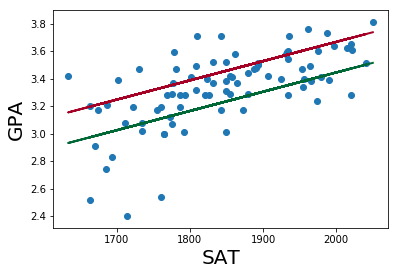

In [18]:
#plotting the data for dummy=1 and dummy=0 cases:
plt.scatter(data['SAT'],y)
yhat_yes=0.8665+0.0014*data['SAT']
yhat_no=0.6439+0.0014*data['SAT']
fig=plt.plot(data['SAT'],yhat_no,lw=2,c='#006837')
fig=plt.plot(data['SAT'],yhat_yes,lw=2,c='#a50026')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()
#The upper line represents the GPA of students who attended lectures and lower line representsthe GPA of those who didnt attend
#both equations have same slope(0.0014) but different intercept
#The GPA of students who attended is 0.2226(dummy coeff) higher than those who didnt attend lectures
#Use c=data['Attendance'],cmap='RdYlGn_r' as parameter for plt.scatter and see the change

# Predicting Values from the model

In [19]:
#creating a dataframe having 'const','SAT','Attendance' columns
#'const' column gets added due to the sm.add_constant method. It has values as 1.It is just a simulation of x0:
#by simulation of x0 we mean-- yhat=b0+b1*x1. In this equation x0 =1. That is what the const column denotes
#with the following code we are creating a new dataframe, which has 3 columns:
#const with value 1, Attendance with values 0 and 1 and SAT with values 1700 and 1670. 1700 and 1670 are the SAT scores of 2 students.The student who got 1700 attended less than 75% of the lectures, whereas the one who got 1670, attended more than 75% of the lectures
new_data=pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [20]:
 #giving the row indexes name:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [21]:
#the regression model is stored in the variable results.
#predict method has a single argument, the new data
predictions=results.predict(new_data)

In [22]:
predictions

0    3.023513
1    3.204163
dtype: float64

In [ ]:
#joining 2 dataframes:
predictionsdf=pd.DataFrame({'Predictions':predictions})
joined=new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

In [ ]:
#so as per the result, you can observe that even though Bob got a 1700 SAT score his overall GPA is 3.02
#as he attended less number of lectures, whereas for Alice it 3.20 even though she got a SAT score of 1670 and attended >75% lectures
#Why we needed the dummy variable? With our previous model without the dummy variable, we would have predicted GPA of 3.17 for Bob and 3.12 for Alice. See the difference!